In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

/tmp/ipykernel_60030/1205417597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


```
[INFO] Input: MPOLICY ondemand
[INFO] Input: MQUERY imgproc
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000
[INFO] Input: NITERS 0
[INFO] Input: FLINK_RATE 100_300000 200_300000 300_300000
[INFO] Input: BUFF -1
[INFO] Input: NCORES 16
[INFO] Input: IPMAPPER 10.10.1.3
[INFO] Input: MCFG 16;16;16 16;8;16
[INFO] Input: NSOURCES
[INFO] Input: NMAPPERS
[INFO] Input: NSINKS
```

In [16]:
df_comb = pd.read_csv("combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
def graph(rate, dfo, dfu, dfpo, dfpe, dfs, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")

    # Add colorbars
    #cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR-delay (us)")
    #cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel('RPS')
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=50, top=116)

    ax.set_title(f"Imgproc @ {rate} RPS", size=22)
    #plt.legend(fontsize=22)
    plt.grid()

    ax.set_xlabel('RPS (K)')
    #ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=40, top=70)

    ax.set_title(f"Imgproc @ {int(rate)} RPS", size=22)
    #plt.legend(fontsize=22, loc='upper left', ncols=5, facecolor='white', framealpha=1.0)
    plt.grid()
    minpow = 9999.0
    for ddf in [dfo, dfpo, dfpe, dfs]:
        print(float(ddf[metric].tolist()[0]))
        if(float(ddf[metric].tolist()[0])/rate > 0.98):
            minpow = min(minpow, float(ddf['pkg_watts_avg'].tolist()[0]))
    print(minpow)
        
    ax.set_box_aspect(0.5) 

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    print(ymin, ymax)
    print(xmin, xmax)

    xxmin = 9999.0
    latlist = dfu[metric].tolist()
    powlist = dfu['pkg_watts_avg'].tolist()
    for i in range(0, len(latlist)):
        if float(latlist[i])/rate > 0.98:
            xxmin = min(xxmin, float(powlist[i]))
    print(xxmin)
    
    for ddf in [dfo, dfpo, dfpe, dfs]:
        print(float(ddf[metric].tolist()[0]))
        if(float(ddf[metric].tolist()[0])/rate > 0.98):
            minpow = min(minpow, float(ddf['pkg_watts_avg'].tolist()[0]))
    print(minpow)
    
    inset_ax = ax.inset_axes([0.15, 0.55, 0.4, 0.4],  # [x, y, width, height] w.r.t. axes
        ylim=[xxmin, minpow], xlim=[0.95*xmax, xmax], # sets viewport & tells relation to main axes
        xticklabels=[]
    )

    inset_ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=100, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    inset_ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=100, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    inset_ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    inset_ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    inset_ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    inset_ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")

    inset_ax.tick_params(axis='both', which='major', labelsize=18)
    plt.grid()

    plt.tight_layout()

100.0
100.0
99.99698052832244
99.98930419389978
49.94
48.349 56.511
90.0 101.0
48.72
100.0
100.0
99.99698052832244
99.98930419389978
49.94


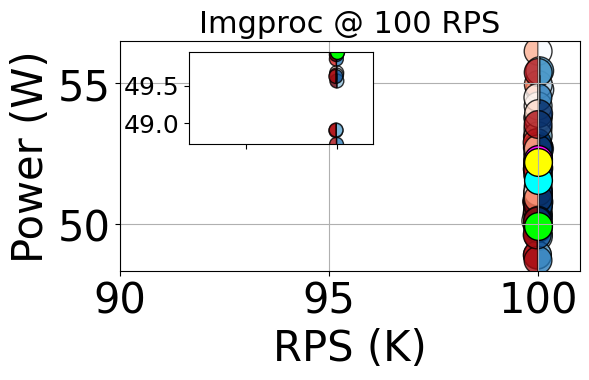

In [17]:
rate=100
dfo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'userspace')]
graph(rate, dfo, dfu, dfpo, dfpe, dfs, 90, int(rate+(rate*0.01)), metric='SourcenumRecordsOutPerSecond_avg')
plt.savefig("imgprocitrdvfs100.pdf", bbox_inches='tight')

200.0057087418301
195.8320942265796
200.00098379629628
200.0
79.62
74.2835 91.14649999999999
190.0 202.0
75.05
200.0057087418301
195.8320942265796
200.00098379629628
200.0
79.62


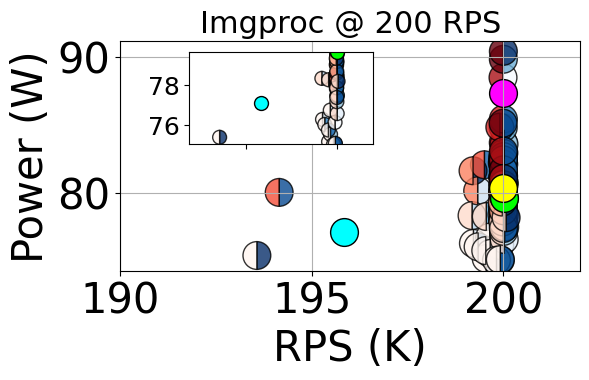

In [18]:
rate=200
dfo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'userspace')]
graph(rate, dfo, dfu, dfpo, dfpe, dfs, 190, int(rate+(rate*0.01)), metric='SourcenumRecordsOutPerSecond_avg')
plt.savefig("imgprocitrdvfs200.pdf", bbox_inches='tight')

296.2754255174292
206.35146377995645
299.9851307189542
299.9697065631808
109.43
71.997 112.983
180.0 309.0
101.12
296.2754255174292
206.35146377995645
299.9851307189542
299.9697065631808
109.43


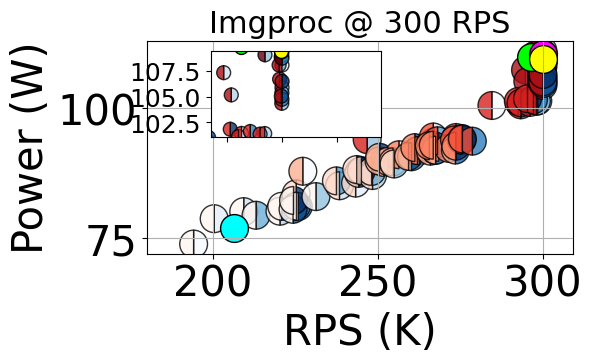

In [19]:
rate=300
dfo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'userspace')]
graph(rate, dfo, dfu, dfpo, dfpe, dfs, 180, int(rate+(rate*0.03)), metric='SourcenumRecordsOutPerSecond_avg')
plt.savefig("imgprocitrdvfs300.pdf", bbox_inches='tight')

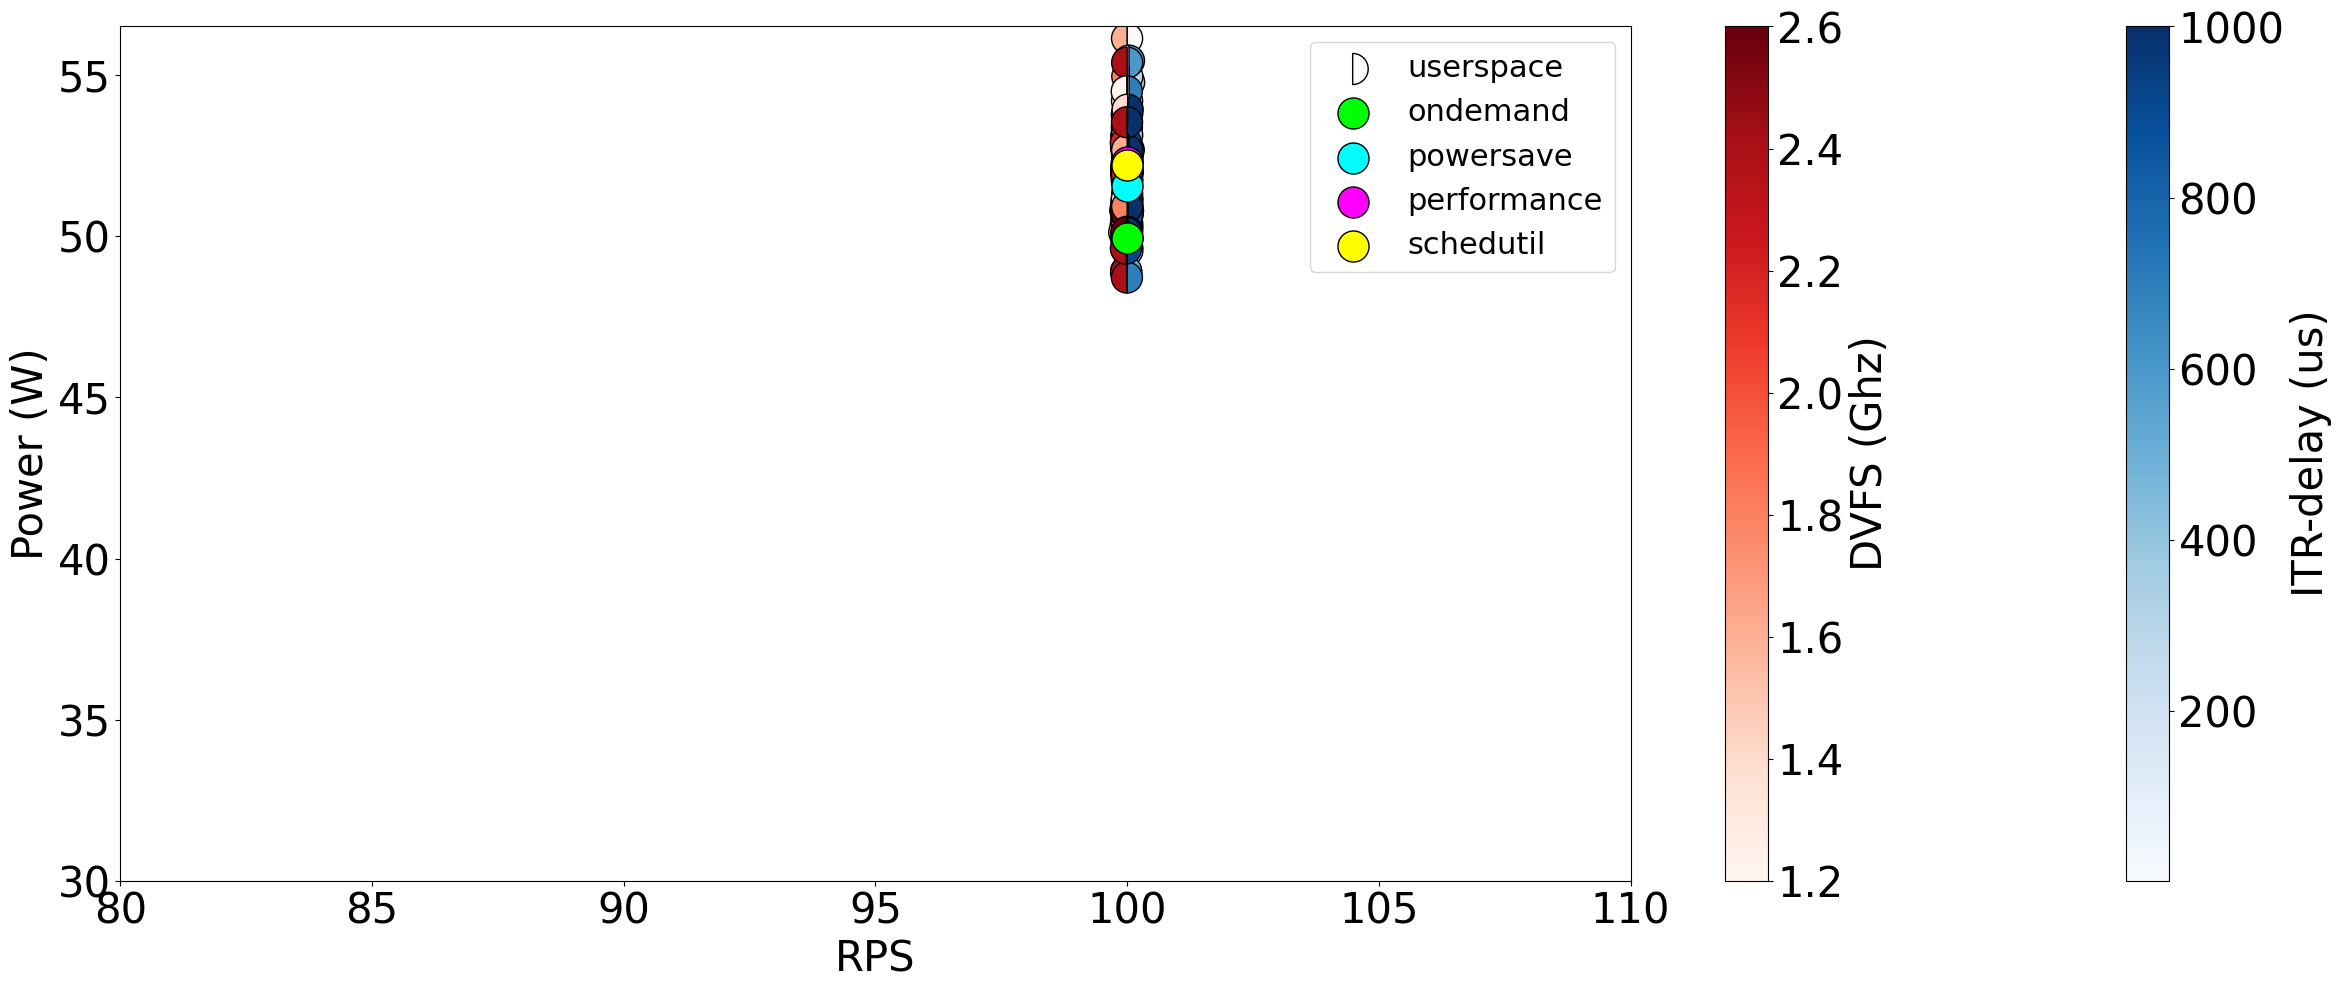

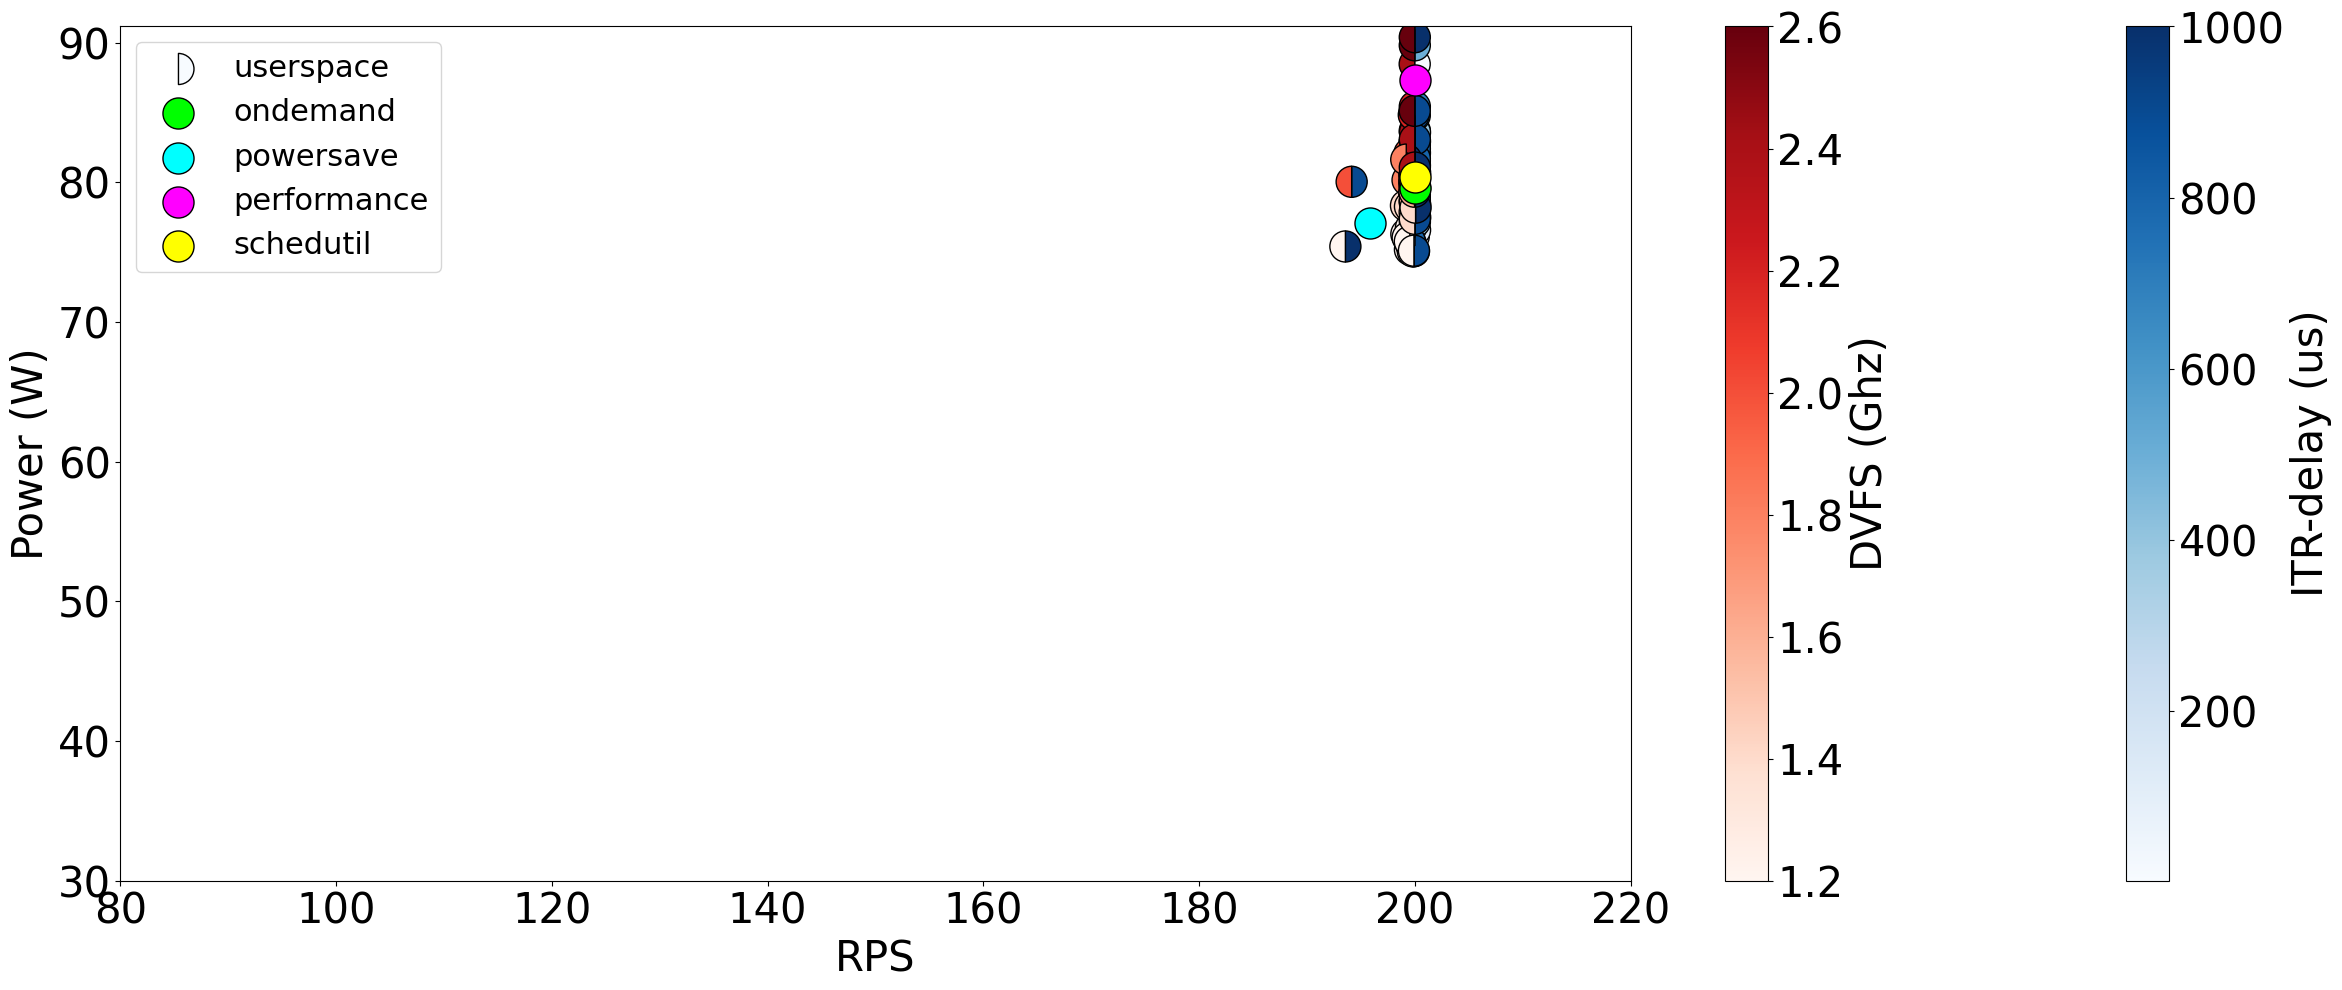

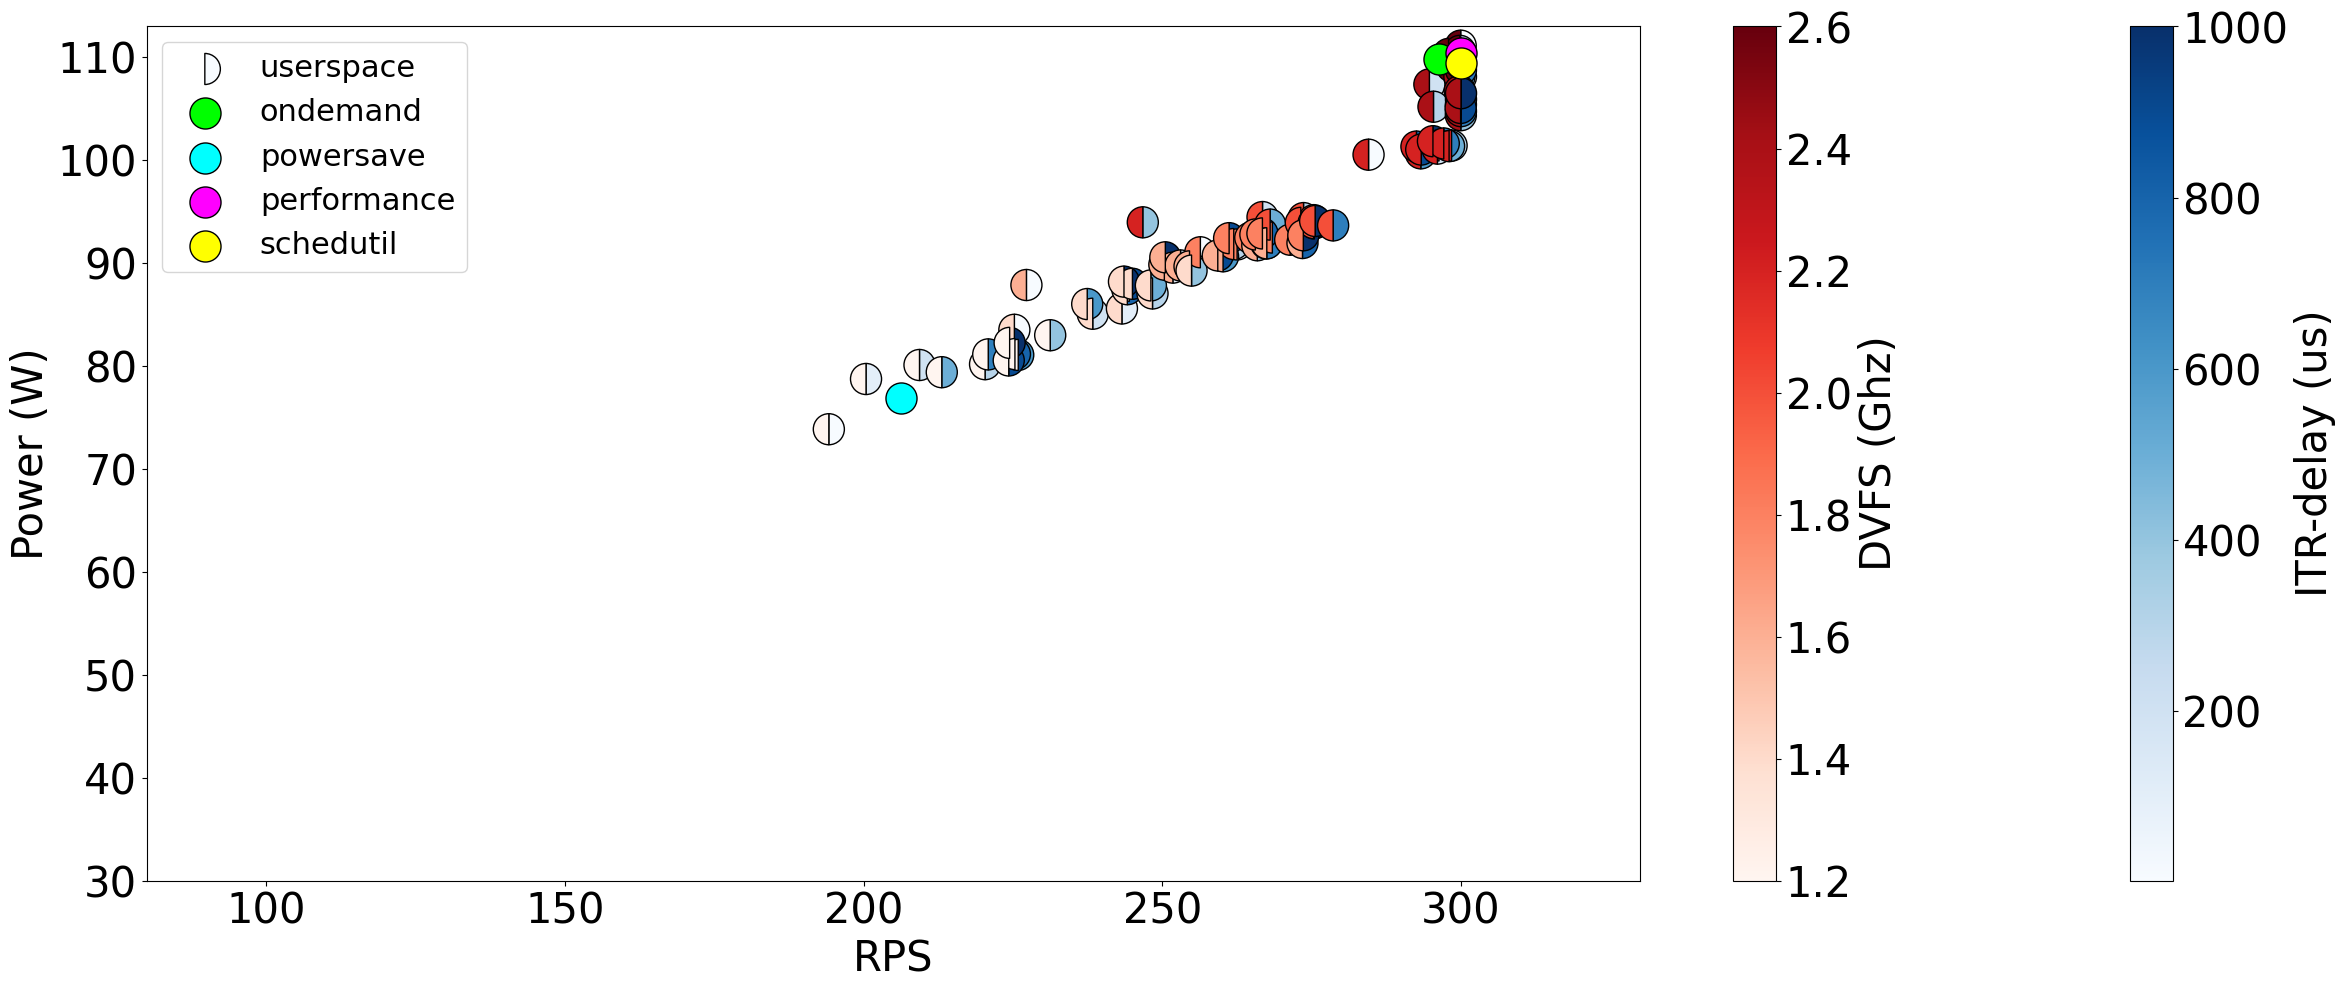

In [14]:
for rate in [100, 200, 300]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 16) & (df_comb.policy == 'userspace')]
    graph(rate, dfo, dfu, dfpo, dfpe, dfs, 80, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg')

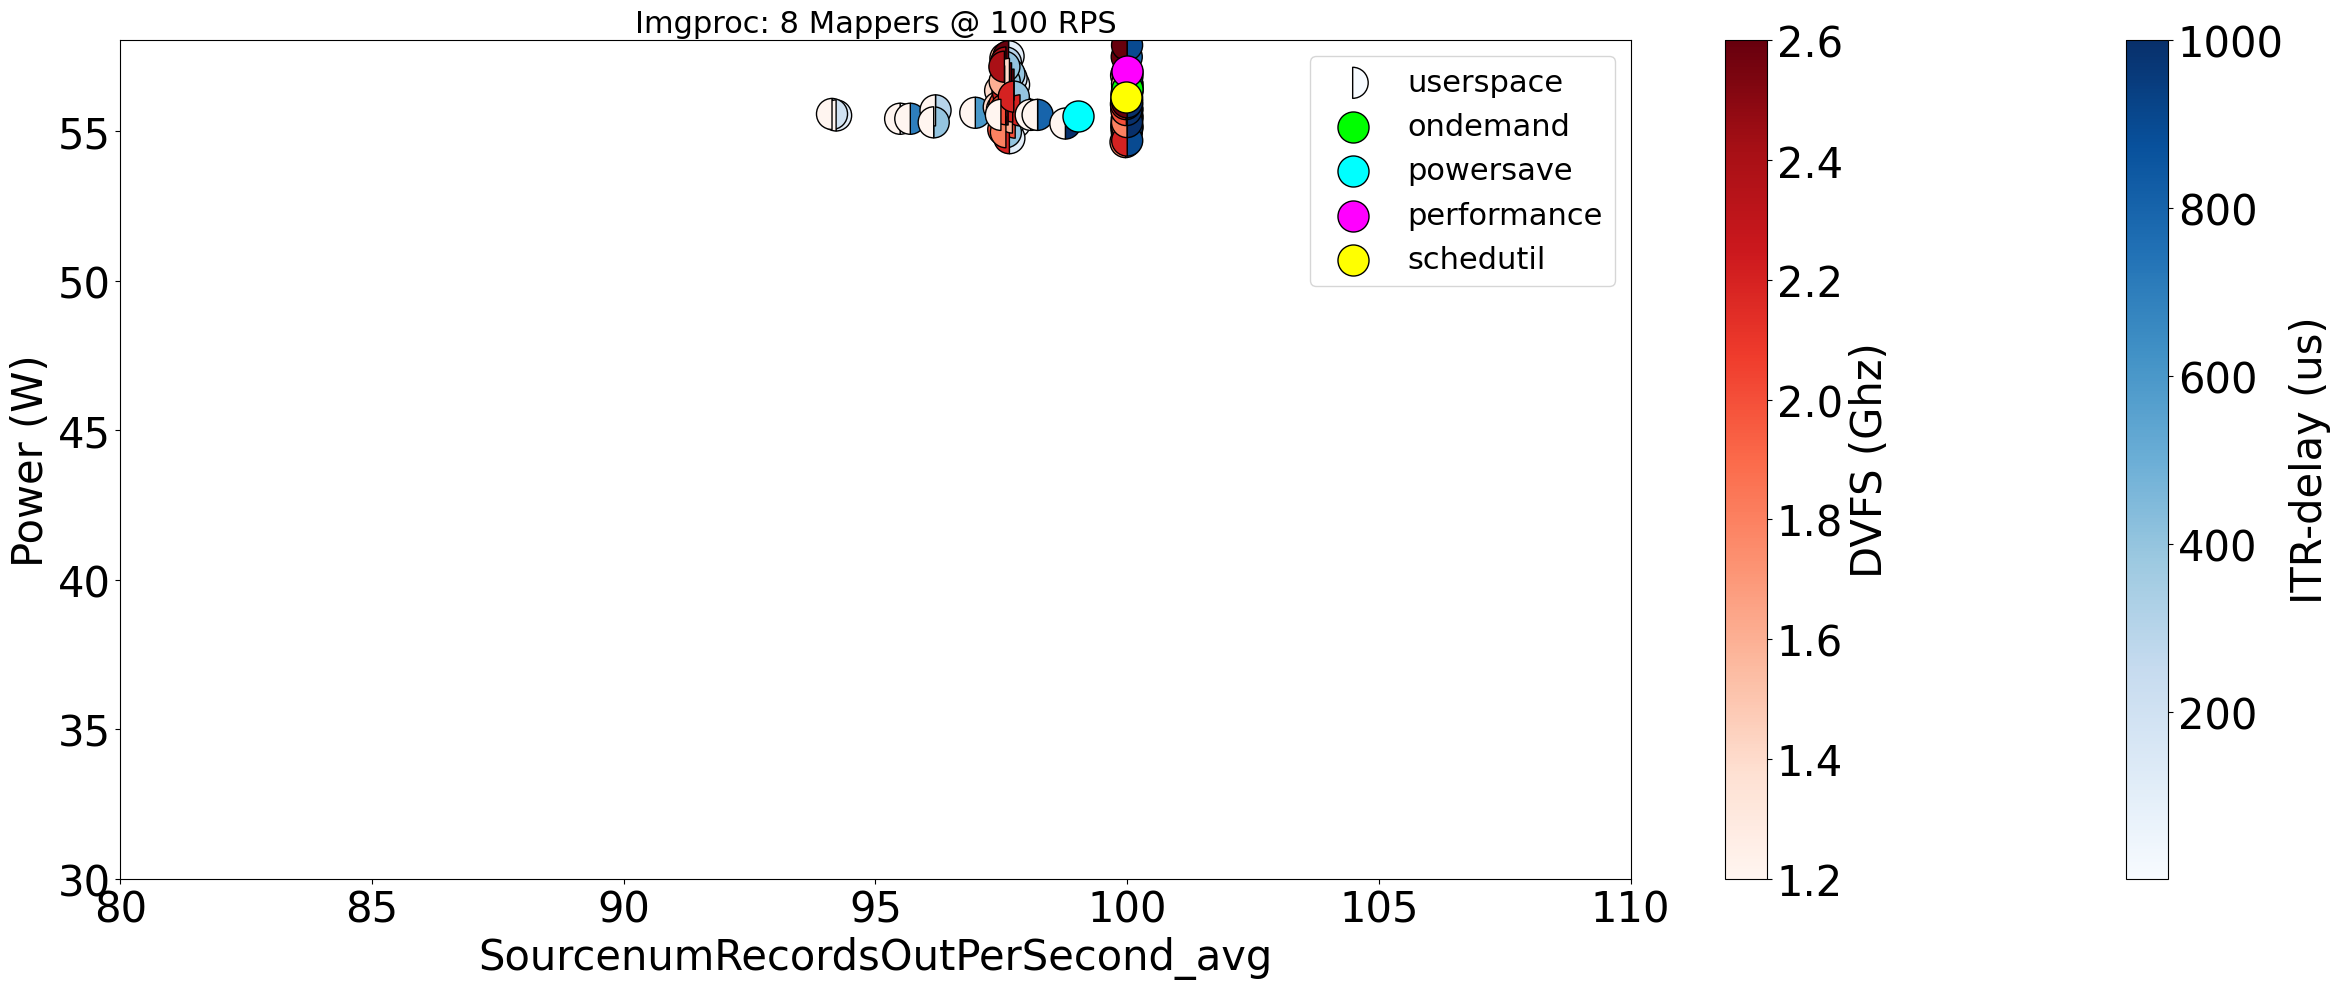

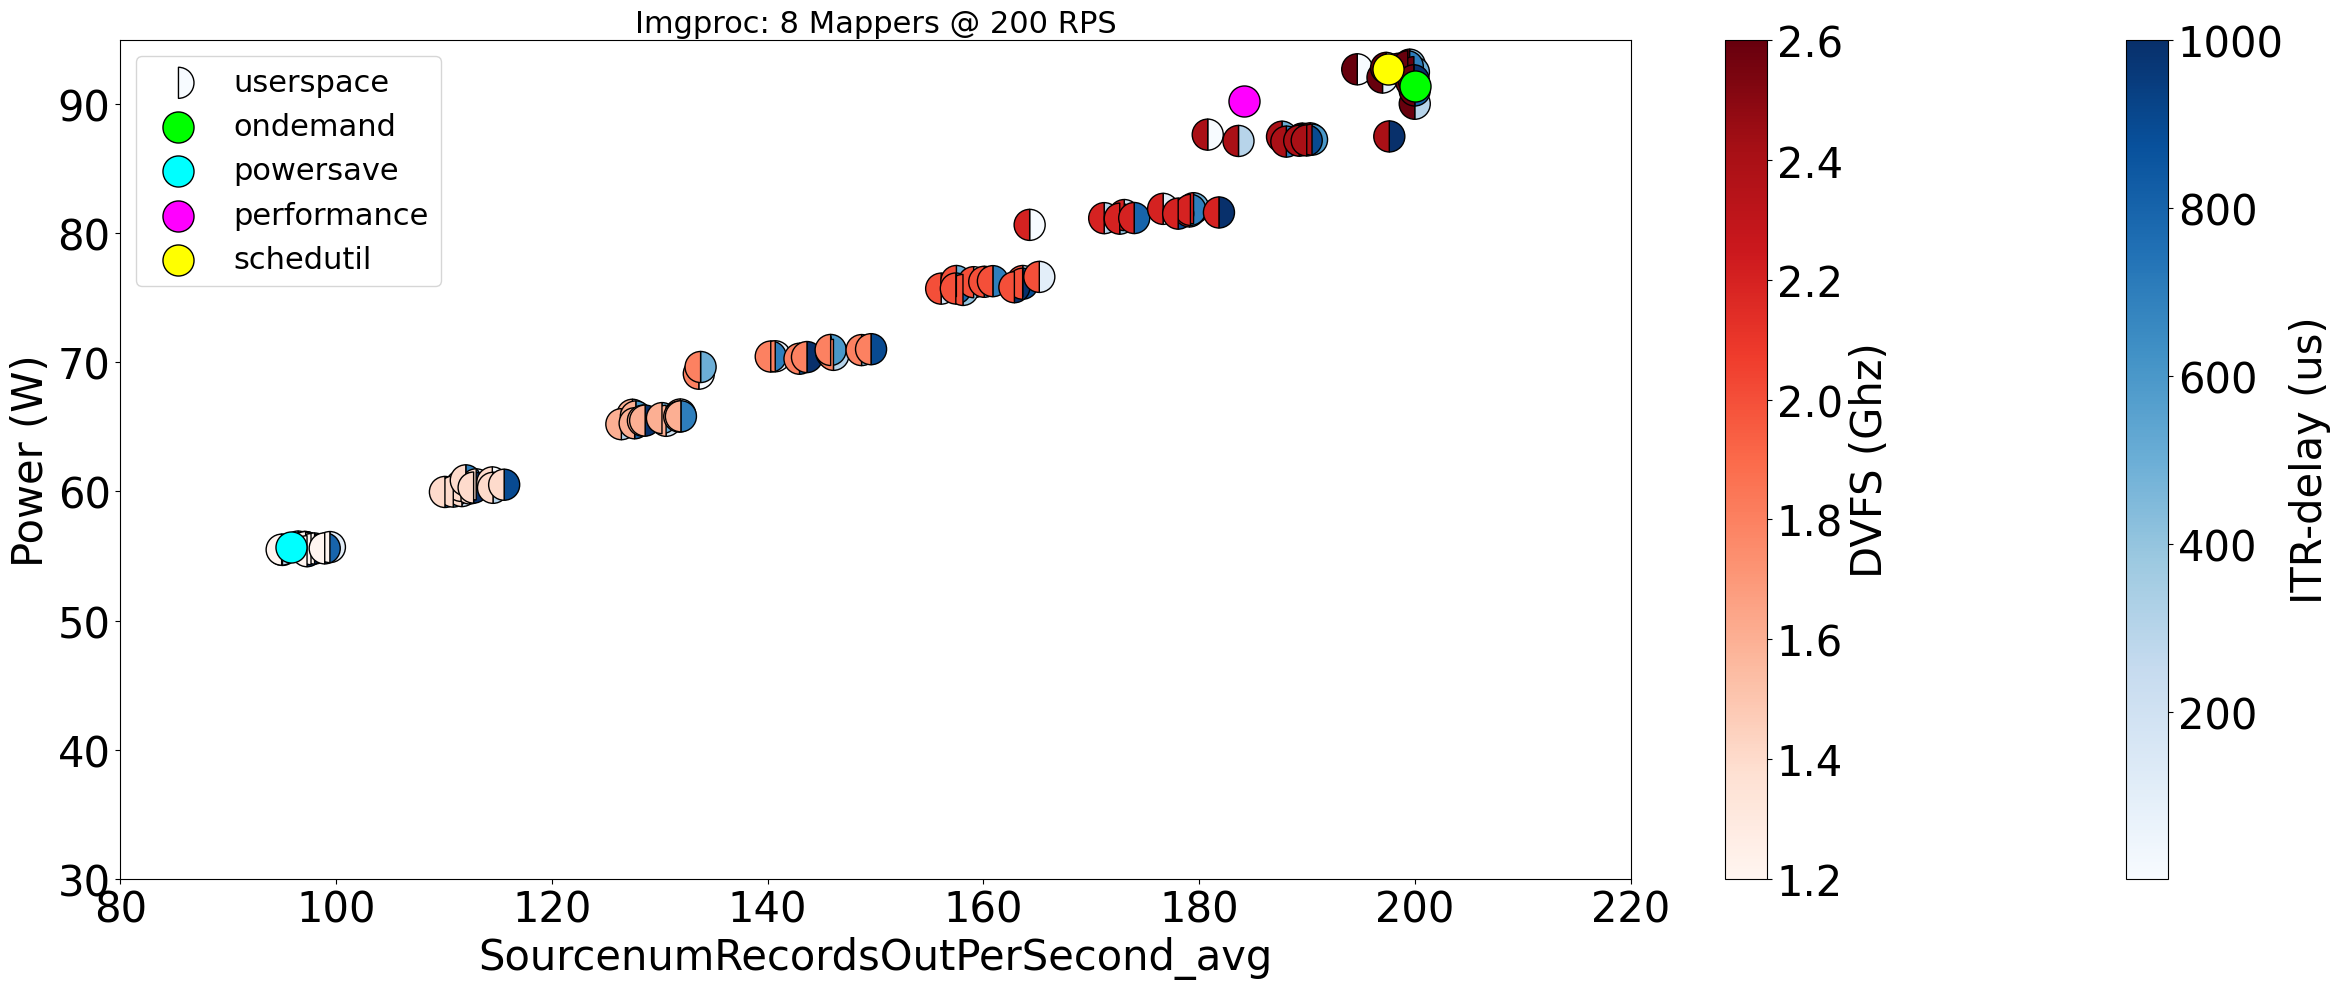

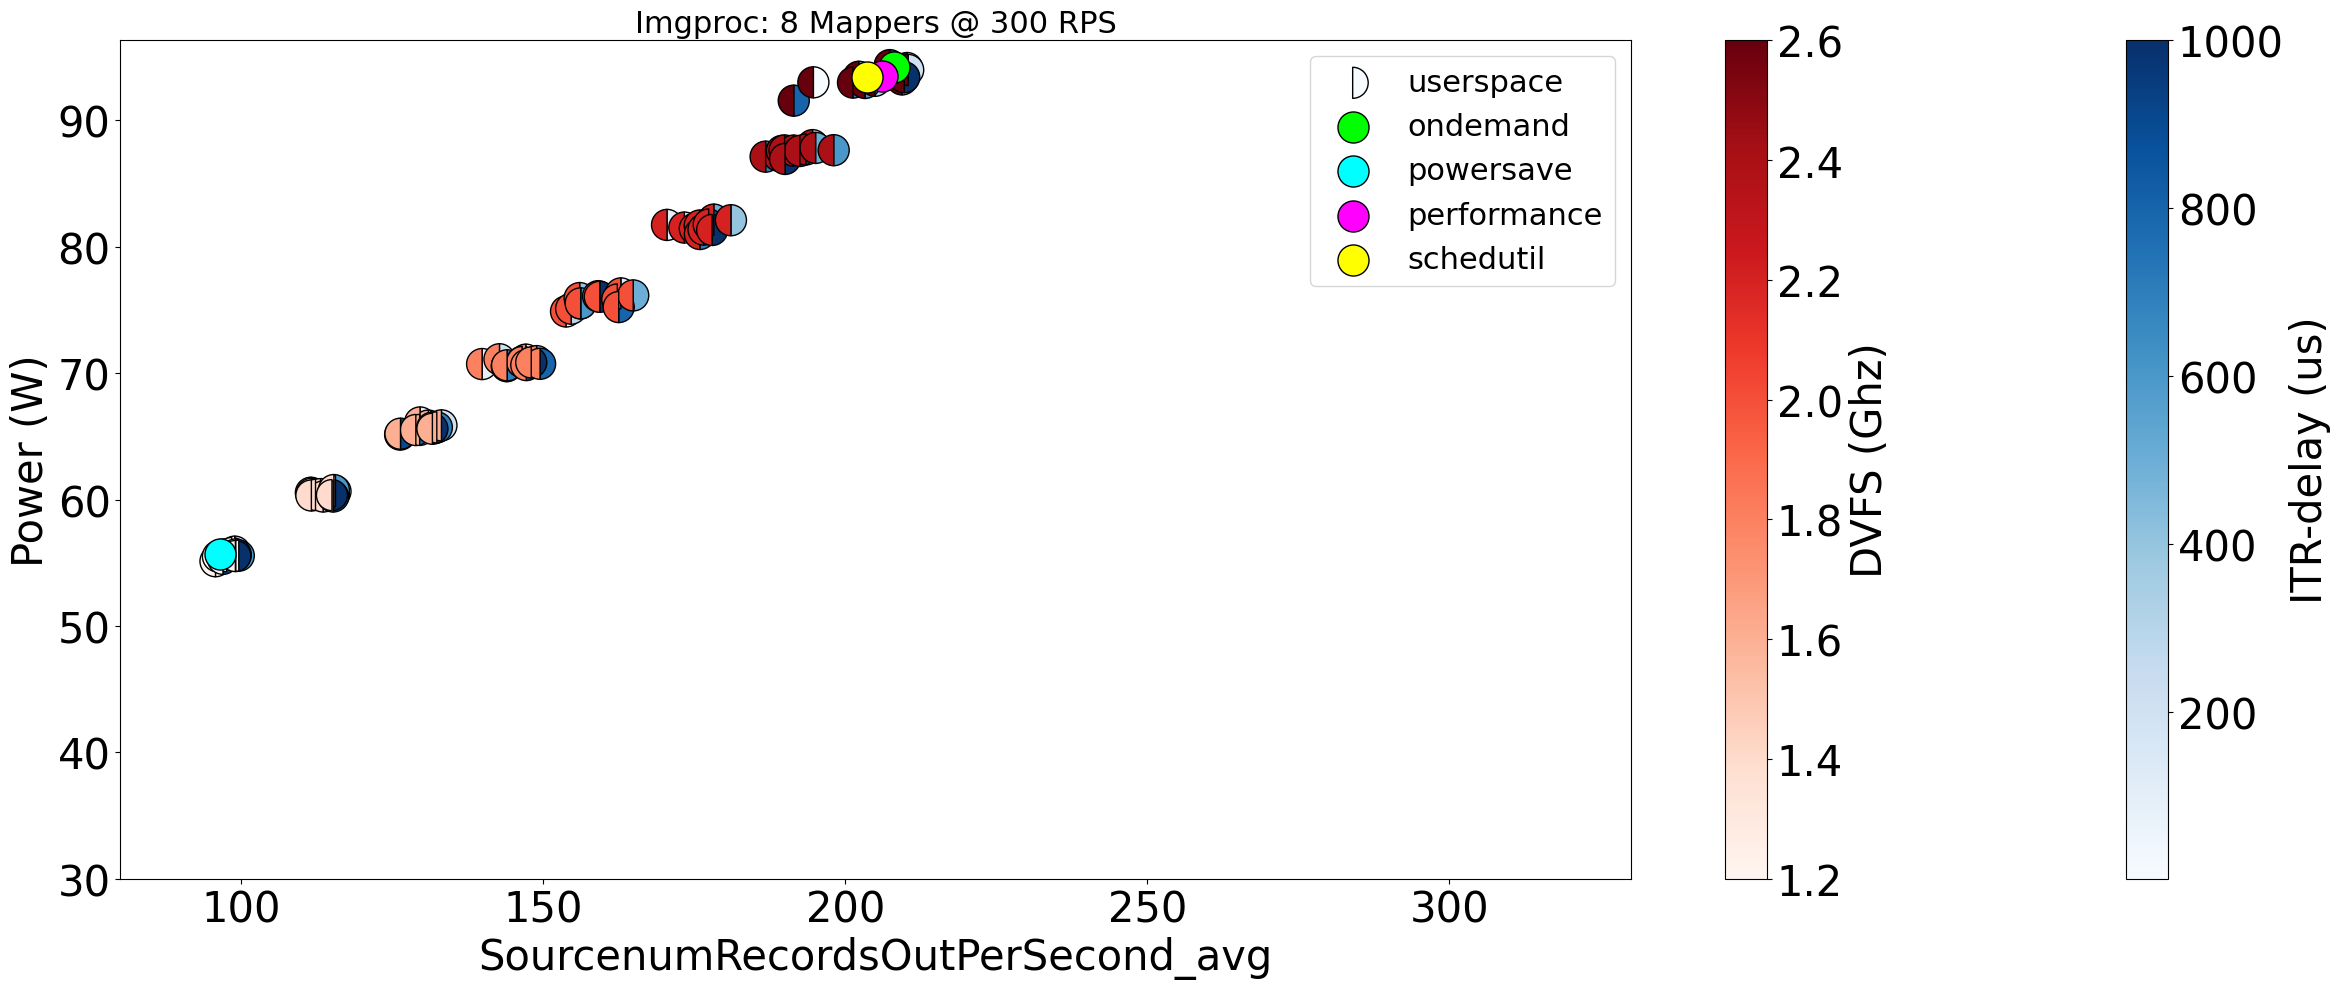

In [10]:
for rate in [100, 200, 300]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 8) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 8) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 8) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 8) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.nmappers == 8) & (df_comb.policy == 'userspace')]
    graph(rate, dfo, dfu, dfpo, dfpe, dfs, 80, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg')